In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
players = pd.read_csv('player_stats.csv')
players.head()

,id,match_won,at_home,player_id,match_id,team_id,MP,OPOS,DPOS,FG,...,ASTP,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS
0,1,0,0,1,1,14,36.533333,NaN,NaN,9,...,0.0,1.4,0.0,16.2,29.1,107,NaN,106,NaN,-4.0
1,2,0,0,2,1,14,17.233333,NaN,NaN,0,...,8.7,0.0,0.0,34.0,14.7,45,NaN,110,NaN,-18.0
2,3,0,0,3,1,14,4.116667,NaN,NaN,0,...,0.0,0.0,0.0,0.0,10.5,49,NaN,105,NaN,-3.0
3,4,0,0,4,1,14,28.450000,NaN,NaN,5,...,0.0,1.8,2.0,27.3,16.7,97,NaN,110,NaN,-18.0
4,5,0,0,5,1,14,32.250000,NaN,NaN,3,...,10.8,0.0,0.0,24.5,21.8,78,NaN,113,NaN,-13.0


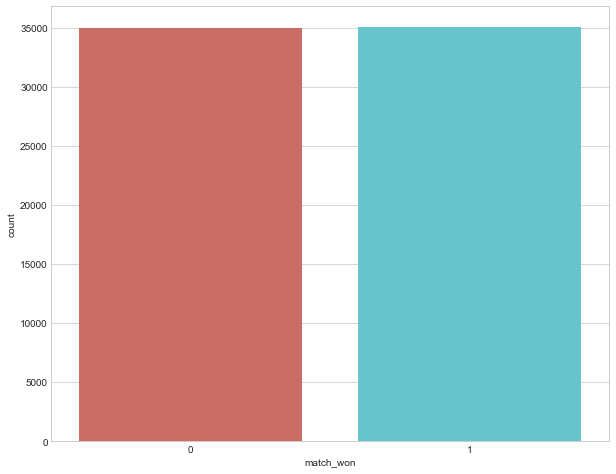

In [4]:
#checking that match_won is binary and that there are an even number of wins and loses 
sb.countplot(x='match_won',data=players, palette='hls')

In [5]:
#checking for null values
players.isnull().sum()

id                0
match_won         0
at_home           0
player_id         0
match_id          0
team_id           0
MP                0
OPOS          70038
DPOS          70038
FG                0
FGA               0
FGP            3346
PTS               0
TWO               0
TWOA              0
TWOP           6099
TWOAr          3346
THR               0
THRA              0
THRP          24006
THRAr          3346
FT                0
FTA               0
FTP           30095
FTAr           3346
FT_to_FGA      3346
EFGP           3346
TSA               0
TSP            2921
HOB               0
FIC               0
PACE          70038
ORB               0
ORBr           8003
DRB               0
DRBr           8003
TRB               0
AST               0
AST_to_TOV    25084
STL               0
STL_to_TOV    25084
BLK               0
TOV               0
PF                0
ORBP              0
DRBP              0
TRBP              0
ASTP              2
STLP              0
BLKP              0


In [7]:
player_data = players.drop(['OPOS', 'DPOS', 'THRP', 'FTP', 'PACE', 'AST_to_TOV', 'STL_to_TOV', 'AORtg', 'ADRtg'],1)
player_data.isnull().sum()

id               0
match_won        0
at_home          0
player_id        0
match_id         0
team_id          0
MP               0
FG               0
FGA              0
FGP           3346
PTS              0
TWO              0
TWOA             0
TWOP          6099
TWOAr         3346
THR              0
THRA             0
THRAr         3346
FT               0
FTA              0
FTAr          3346
FT_to_FGA     3346
EFGP          3346
TSA              0
TSP           2921
HOB              0
FIC              0
ORB              0
ORBr          8003
DRB              0
DRBr          8003
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
ORBP             0
DRBP             0
TRBP             0
ASTP             2
STLP             0
BLKP             0
TOVP          2368
USGP             0
ORtg             0
DRtg             0
PLUS_MINUS       4
dtype: int64

In [8]:
player_data.dropna(inplace=True)
player_data.isnull().sum()

id            0
match_won     0
at_home       0
player_id     0
match_id      0
team_id       0
MP            0
FG            0
FGA           0
FGP           0
PTS           0
TWO           0
TWOA          0
TWOP          0
TWOAr         0
THR           0
THRA          0
THRAr         0
FT            0
FTA           0
FTAr          0
FT_to_FGA     0
EFGP          0
TSA           0
TSP           0
HOB           0
FIC           0
ORB           0
ORBr          0
DRB           0
DRBr          0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
ORBP          0
DRBP          0
TRBP          0
ASTP          0
STLP          0
BLKP          0
TOVP          0
USGP          0
ORtg          0
DRtg          0
PLUS_MINUS    0
dtype: int64

In [11]:
player_data.corr()

,id,match_won,at_home,player_id,match_id,team_id,MP,FG,FGA,FGP,...,DRBP,TRBP,ASTP,STLP,BLKP,TOVP,USGP,ORtg,DRtg,PLUS_MINUS
id,1.000000,-0.000223,0.000632,0.280237,0.999992,-0.004862,-0.013852,0.017965,0.009009,0.016760,...,0.014012,0.002865,0.001581,-0.006213,0.006524,-0.022959,-0.002145,0.036166,0.102679,0.000711
match_won,-0.000223,1.000000,0.170871,-0.042963,-0.000263,0.060800,0.009498,0.077207,0.001216,0.116451,...,0.003290,0.049011,0.024800,0.038649,0.040253,-0.029958,-0.000184,0.166570,-0.477716,0.537180
at_home,0.000632,0.170871,1.000000,0.000757,0.000371,-0.007090,0.001947,0.016820,-0.000105,0.026334,...,0.011549,0.020743,0.012925,0.002268,0.024366,-0.011583,0.002322,0.040325,-0.118428,0.127975
player_id,0.280237,-0.042963,0.000757,1.000000,0.279962,-0.028946,-0.165169,-0.109962,-0.120330,-0.020543,...,0.016506,0.023800,-0.039720,0.003883,0.000191,0.005015,-0.025066,-0.030091,0.044634,-0.027608
match_id,0.999992,-0.000263,0.000371,0.279962,1.000000,-0.004789,-0.013806,0.017957,0.009034,0.016731,...,0.014006,0.002852,0.001580,-0.006207,0.006545,-0.022945,-0.002143,0.036104,0.102542,0.000674
team_id,-0.004862,0.060800,-0.007090,-0.028946,-0.004789,1.000000,-0.003724,0.012495,-0.002595,0.035800,...,0.006625,0.008378,-0.002610,0.013660,0.003740,-0.005359,-0.004158,0.034943,-0.005867,0.041685
MP,-0.013852,0.009498,0.001947,-0.165169,-0.013806,-0.003724,1.000000,0.652863,0.734792,0.096509,...,-0.136511,-0.203864,0.211927,0.048322,-0.045682,-0.023357,0.126576,0.166369,0.036684,0.108279
FG,0.017965,0.077207,0.016820,-0.109962,0.017957,0.012495,0.652863,1.000000,0.857424,0.441200,...,-0.044771,-0.059007,0.239615,0.048073,-0.012765,-0.138575,0.540558,0.413199,0.018060,0.200012
FGA,0.009009,0.001216,-0.000105,-0.120330,0.009034,-0.002595,0.734792,0.857424,1.000000,0.042808,...,-0.105979,-0.140111,0.283552,0.057225,-0.064184,-0.167082,0.637606,0.105718,0.030490,0.087495
FGP,0.016760,0.116451,0.026334,-0.020543,0.016731,0.035800,0.096509,0.441200,0.042808,1.000000,...,0.068954,0.085523,0.006950,0.002100,0.080808,-0.000771,-0.007196,0.767760,-0.017201,0.203855


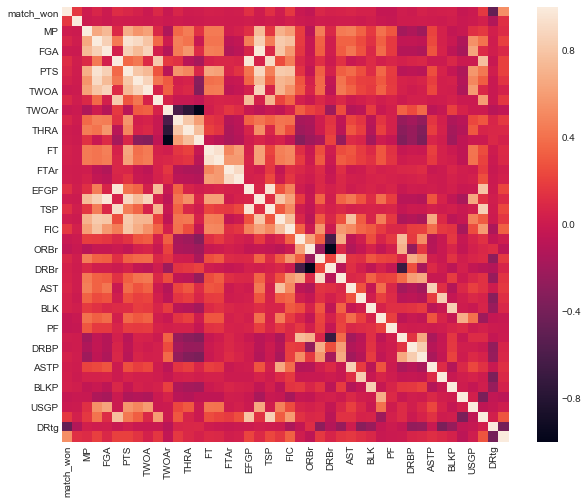

In [13]:
player_f = player_data.drop(['id', 'match_id','team_id','player_id'], 1)
sb.heatmap(player_f.corr())

In [14]:
player_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58985 entries, 0 to 70037
Data columns (total 44 columns):
match_won     58985 non-null int64
at_home       58985 non-null int64
MP            58985 non-null float64
FG            58985 non-null int64
FGA           58985 non-null int64
FGP           58985 non-null float64
PTS           58985 non-null int64
TWO           58985 non-null int64
TWOA          58985 non-null int64
TWOP          58985 non-null float64
TWOAr         58985 non-null float64
THR           58985 non-null int64
THRA          58985 non-null int64
THRAr         58985 non-null float64
FT            58985 non-null int64
FTA           58985 non-null int64
FTAr          58985 non-null float64
FT_to_FGA     58985 non-null float64
EFGP          58985 non-null float64
TSA           58985 non-null float64
TSP           58985 non-null float64
HOB           58985 non-null float64
FIC           58985 non-null float64
ORB           58985 non-null int64
ORBr          58985 non-nul

In [17]:
x = player_f.iloc[:,1:43].values
y = player_f.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state=20)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

#6116 true positive, 6093 true negative, others 

array([[6116, 1277],
       [1261, 6093]])

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83      7393
          1       0.83      0.83      0.83      7354

avg / total       0.83      0.83      0.83     14747

